In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(7, 7)

# Attribute Information:

**Input variables**:

`bank client data`:

1.  age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

`related with the last contact of the current campaign`:

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

`other attributes`:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

`social and economic context attributes`

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
data = pd.read_csv('../data/raw/bank-additional.csv', delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
cat_cols = data.columns[data.dtypes == object].tolist()
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [6]:
num_cols = list(data.select_dtypes([np.number]).columns)
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

смотрим на корреляции:

In [7]:
import seaborn as sns

<AxesSubplot:>

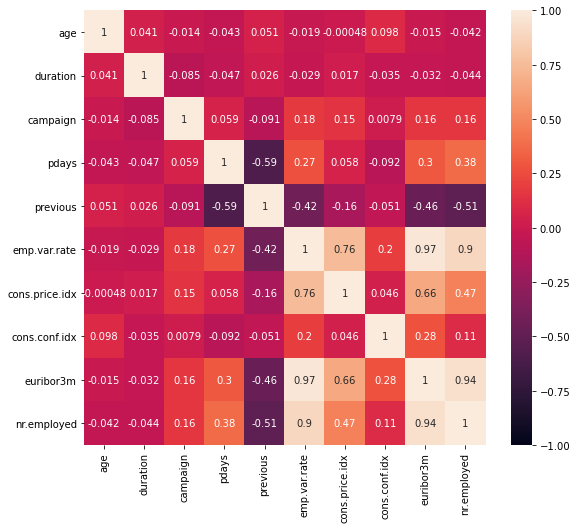

In [8]:
df_corr = data[num_cols].corr()

figsize(9, 8)
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)


Сильно коррелируют:
 - `nr.employed` и `euribor3m`
 - `nr.employed` и `emp.var.rate`
 - `euribor3m` и `emp.var.rate`
 - `cons.price.idx` и `euribor3m`
 - `cons.price.idx` и `emp.var.rate` 

 
Еще корреляции:
 - `previous` и `euribor3m`, `pdays`, `emp.var.rate`
 - `cons.price.idx` и `nr.employed`
 

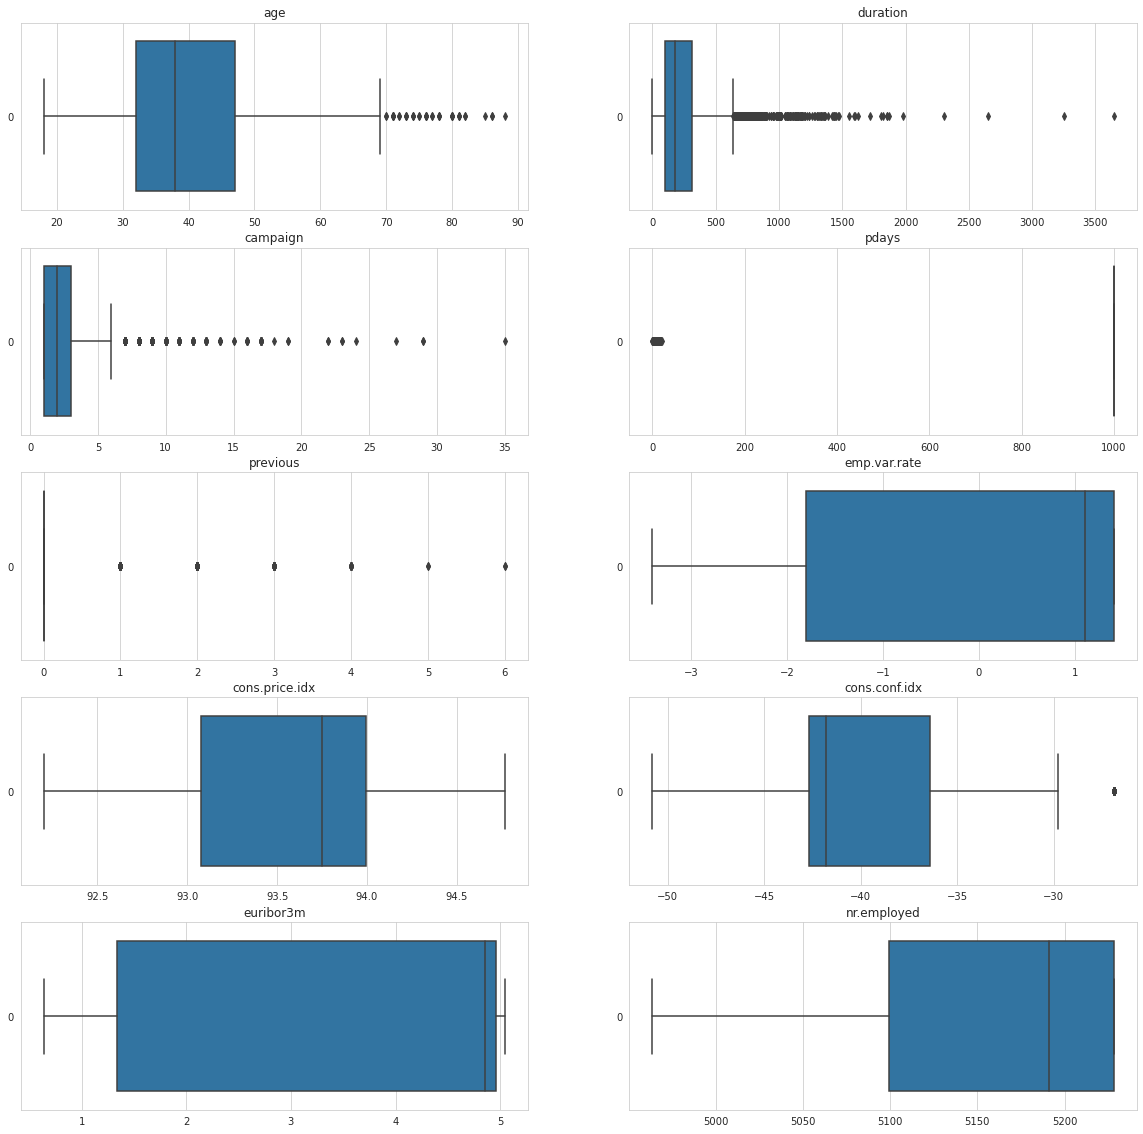

In [9]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"), sns.color_palette('tab10'):
    fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
    for i, param in enumerate(num_cols):
        sns.boxplot(data=data[param], orient='h', ax=ax[i // 2, i %2])
        ax[i // 2, i %2].set_title(param)

Уберем выбросы

In [10]:
data = data[data['age'] < 70]

In [11]:
data = data[data['campaign'] <= 6]

one-hot encoding

In [12]:
df = pd.get_dummies(data=data, drop_first=True)

In [13]:
from sklearn import preprocessing

In [14]:
scaler = preprocessing.StandardScaler()
num_cols.remove('pdays')
df[num_cols] = df[num_cols].apply(lambda col: 
                                  scaler.fit_transform(
                                         col.to_numpy().reshape(-1, 1)
                                            ).ravel())

In [15]:
# del df['previous']
del df['duration']

del df['euribor3m']
# del df['cons.price.idx']
# del df['emp.var.rate']

In [16]:
df.to_csv('../data/processed/bank-additional-prepared.csv', sep=';')